# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

In [1]:
"""

# Name      :  Prasanna Marudhu Balasubramanian
# UID       :  116197700
# Course    :  ENPM809K - Fundamentals for Artificial Intelligence and Deep Learning Framework
# Semester  :  Spring 2019

"""    

'\n\n# Name      :  Prasanna Marudhu Balasubramanian\n# UID       :  116197700\n# Course    :  ENPM809K - Fundamentals for Artificial Intelligence and Deep Learning Framework\n# Semester  :  Spring 2019\n\n'

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [2]:
#The modules used in this python notebook are listed below

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from load_dataset import load_dataset                    #loading the data from the given python file
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split


%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [3]:
#This function resizes and converts all the images into an array

def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT)) #Image resized
    image_array = np.array(image_resized).T                   #Resized images are converted to an array
    return image_array

In [4]:
#This function generates the test and train set data with test size splitted into 80-20,
# where 80% of images are used for training and remaining 20% are used for testing.

def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [5]:
# set the num_pix to 64
num_pix = 64

#The values of the test and train variables are loaded
train_set_x_orig, test_set_x_orig, train_set_y, test_set_y= create_train_test_data(64,0.2)      
pass

#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [6]:
#Number of training examples: m_train #Number of testing examples: m_test #Height/Width of each image: num_px
#values are calculated

m_train = train_set_y.shape[0]
m_test = test_set_y.shape[0]
num_px = train_set_x_orig.shape[0]

#Printing the values of m_test, m_train and num_px 
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

#Shape of the train and test datasets are printed
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 640
Number of testing examples: m_test = 160
Height/Width of each image: num_px = 640
Each image is of size: (640, 640, 3)
train_set_x shape: (640, 3, 64, 64)
train_set_y shape: (640,)
test_set_x shape: (160, 3, 64, 64)
test_set_y shape: (160,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [7]:
#Fixing the possible ill-shape
#printing the shape of the train_set_y and test_set_y

print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_y shape: (640,)
test_set_y shape: (160,)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [8]:
# Reshaping the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#printing the flatten shape of data
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 640)
train_set_y shape: (640,)
test_set_x_flatten shape: (12288, 160)
test_set_y shape: (160,)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [9]:
#Standardising the data by dividing every row of the dataset by 255
train_set_x = train_set_x_flatten/255.0
test_set_x = test_set_x_flatten/255.0

#printing the standardized shape of the dataset
print ("train_set_x_standard shape: " + str(train_set_x.shape))
print ("train_set_x_standard shape: " + str(test_set_x.shape))

train_set_x_standard shape: (12288, 640)
train_set_x_standard shape: (12288, 160)


## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [10]:
#This function performs the sigmoid functionality inorder to fix the output between 0 and 0.5.
#Computing the sigmoid of z, where z is a scalar or numpy array of any size.


def sigmoid(z):
    

    ###CODE STARTS HERE ### 
    s = 1/(1 + np.exp(-z))
    ###CODE ENDS HERE ###
    
    return s

In [11]:
#Printing the sigmoid output value
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [12]:
#This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
#dim -- size of the w vector we want (or number of parameters in this case)
#Returns:  w -- initialized vector of shape (dim, 1) and b -- initialized scalar (corresponds to the bias)

def initialize_with_zeros(dim):
   
    
    ###CODE STARTS HERE ###
    w = np.zeros((dim, 1))
    b = 0
    ###CODE ENDS HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [13]:
dim = 2
w, b = initialize_with_zeros(dim)

#printing the 'w' and 'b' values
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [14]:
###This function implements the cost function and its gradient for the propagation explained above
### where arguments are:
#   w -- weights, a numpy array of size (num_px * num_px * 3, 1) #   b -- bias, a scalar
#   Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
#   X -- data of size (num_px * num_px * 3, number of examples)

### 
#   cost -- negative log-likelihood cost for logistic regression ; #   dw -- gradient of the loss with respect to w, thus same shape as w
#   db -- gradient of the loss with respect to b, thus same shape as b

### FORWARD PROPOGATION:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### 
    A = sigmoid(np.dot(w.T, X) + b)                                     # compute activation
    cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))               # compute cost
    ### END CODE HERE ###
    
    ### START CODE HERE ### 
    dw = 1./m*np.dot(X, (A-Y).T)
    db = 1./m*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    #cost = np.squeeze(cost)
    #assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [15]:
# BACKWARD PROPAGATION (TO FIND GRAD)
    ### START  ### 
def backwardpropagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### 
    A = sigmoid(np.dot(w.T, X) + b)                                     # compute activation
    cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))               # compute cost
    ### END CODE HERE ###
    
    ### START CODE HERE ### 
    dw = 1./m*np.dot(X, (A-Y).T)
    db = 1./m*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    #cost = np.squeeze(cost)
    #assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads
    

In [16]:
# The method of FORWARD and BACKWARD propogation is implemented to compute gradients 𝑑𝑤  and  𝑑𝑏  
# calculating the weights(w) and bias(b)  to determine the grads and cost

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)

#printing the values of cost, dw and db which are obtained from w and b values
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [17]:
   """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
  
        ### START  ### 
        grads, cost =propagate(w, b, X, Y)
        ### END  ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        ### START  ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END  ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Printing the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs 

In [18]:
#calculating the values of the params, grads and costs form the optimize function

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [45]:
'''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
'''

def predict(w, b, X):
    print ("w", w)
    print ("b", b)
    print ("X.shape", X)
    
    print ("w", w.shape)
    print ("b", b.shape)

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Computing vector "A" predicting the probabilities of a cat being present in the picture
    ### START ###
    A =   sigmoid(np.dot(w.T, X) + b)
    ### END ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
             Y_prediction[0, i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [46]:
#printing the prediction values
print ("predictions = " + str(predict(w, b, X)))

w [[1]
 [2]]
b 2
X.shape [[1 2]
 [3 4]]
w (2, 1)


AttributeError: 'int' object has no attribute 'shape'

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [48]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START ###
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    print("w-shape", w.shape)
    print("b-shape", b.shape)
    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## 5. Run the regression model function to train your model.

### 5.1 - Setting parameters (part 1)

Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [49]:
#setting the number of iteration to 5000 and learning rate as 0.0005 and estimating the cost and the accuracy values

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.652803
Cost after iteration 200: 0.642602
Cost after iteration 300: 0.633797
Cost after iteration 400: 0.625975
Cost after iteration 500: 0.618892
Cost after iteration 600: 0.612393
Cost after iteration 700: 0.606368
Cost after iteration 800: 0.600740
Cost after iteration 900: 0.595449
Cost after iteration 1000: 0.590450
Cost after iteration 1100: 0.585706
Cost after iteration 1200: 0.581187
Cost after iteration 1300: 0.576869
Cost after iteration 1400: 0.572731
Cost after iteration 1500: 0.568754
Cost after iteration 1600: 0.564924
Cost after iteration 1700: 0.561228
Cost after iteration 1800: 0.557655
Cost after iteration 1900: 0.554193
Cost after iteration 2000: 0.550836
Cost after iteration 2100: 0.547574
Cost after iteration 2200: 0.544401
Cost after iteration 2300: 0.541311
Cost after iteration 2400: 0.538298
Cost after iteration 2500: 0.535358
Cost after iteration 2600: 0.532486
Cost after iteration 2700: 0.529678
Cost

In [23]:
#y_pred_train = predictions( w = final_params["weights"], b = final_params["bias"], X = train_set_x )
#print( "%.2f%%" %( 100.0*np.sum(y_pred_train == train_set_y)/train_set_y.shape[1] ) )

In [24]:
#y_pred_test = predictions( w = final_params["weights"], b = final_params["bias"], X = test_set_x )
#print( "%.2f%%" %( 100.0*np.sum(y_pred_test == test_set_y)/test_set_y.shape[1] ) )

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 80.78125 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 64.375 % </td>
    </tr>
</table> 




Plotting the cost function and the gradients.

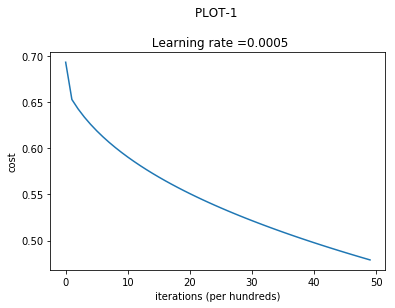

In [25]:
# Plot learning curve (with costs) for 5000 iterations with learning factor 0.0005
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-1 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()

### 5.1 - Setting parameters (part 2)

Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [26]:
#setting the number of iteration to 2000 and learning rate as 0.005 and estimating the cost and the accuracy values

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.835387
Cost after iteration 200: 0.791591
Cost after iteration 300: 0.753244
Cost after iteration 400: 0.717081
Cost after iteration 500: 0.682776
Cost after iteration 600: 0.650456
Cost after iteration 700: 0.620043
Cost after iteration 800: 0.591323
Cost after iteration 900: 0.564055
Cost after iteration 1000: 0.538031
Cost after iteration 1100: 0.513085
Cost after iteration 1200: 0.489088
Cost after iteration 1300: 0.465942
Cost after iteration 1400: 0.443566
Cost after iteration 1500: 0.421892
Cost after iteration 1600: 0.400859
Cost after iteration 1700: 0.380414
Cost after iteration 1800: 0.360521
Cost after iteration 1900: 0.341180
train accuracy: 91.25 %
test accuracy: 60.0 %


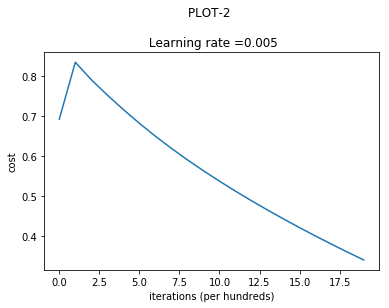

In [27]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-2 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()



## 5.3 - Analysis

Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Observation:

The following data are inferred fromn the obtained plots (PLOT-1 and PLOT-2)

1) In plot-1, the number of iteration was set as 5000 with learning factor as 0.0005.
    - In this plot it is observed that the cost was decreasing continuously from 0.69 to 0.34 for each iteration.
    - The Training set accuracy is 80.78125 and the Test set accuracy is 64.375 
   
2) In plot-2, the number of iteration was set as 2000 with learning factor as 0.005.
    - In this plot it is noticed that the cost was shooting higher first from 0.69 to 0.83 and then it started decreasing continuously from 0.83 to 0.34 in each iteration.
    - The Training set accuracy is 91.25 and the Test set accuracy is 60.00 

Inference: 
    - Both plots shows that the parameters including the weight and bias are learned in each iteration.
    - When the number of iterations are increased beyond 5000 to 7000, it is observed that the training set accuracy increases but on the other hand the test set accuracy decreases considerably.
    - Also the learning rate value modifies the value of resulting model accuracy .
    - The Learning rate also contributes for the cost oscillation rate. The increase in the learning rate leads to increase in training accuracy with decrease in test data accuracy
    

In [28]:
### Till now, the training and the test accutracy for the cat and dog images are calculated and the results are obtained ###
#-----------------------------------------------------------------------------------------------------------------------------#
### The algorithm is going to be checked for the train, test and dev-data accuracy through the code mentioned below ###


##  6.1 - CAR DATASET ANALYSIS


In [29]:
#Loading the dataset values from the given load_dataset.py file

def load_dataset(database_path):
    # open dataset 
    dataset_db = h5py.File('car_dataset.hdf5', 'r')
    
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        # load the train set feautres (picuture)
        datasets[dataset] = {'X' : np.array(dataset_db[dataset + "_img"][:]),  # dataset features
                              'Y' : np.array(dataset_db[dataset + "_labels"][:]) # dataset labels
                            }
    return datasets


## 6.2 - Obtaining the Training, Development and Test dataset values

In [30]:
#The values from the hdf5 files are stored in the database variable
database=load_dataset('./HomeWork/car_dataset.hdf5')

#The Train set data, Test set data and Dev set data are obtained individually and stored in different variables
Train_Set_X = database["train"]["X"]
Train_Set_Y = database["train"]["Y"]
Dev_Set_X = database["dev"]["X"]
Dev_Set_Y = database["dev"]["Y"]
Test_Set_X = database["test"]["X"]
Test_Set_Y = database["test"]["Y"]



## 6.3 - Reshaping the dataset values


In [31]:
#Reshaping the variable values
### START ###
m_train_car = Train_Set_Y.shape[0]
m_dev_car = Dev_Set_Y.shape[0]
m_test_car = Test_Set_Y.shape[0]
num_px_car = Train_Set_X.shape[0]
### END ###

#Printing the values of m_test, m_train and num_px
print ("Number of training examples: m_train_car = " + str(m_train_car))
print ("Number of dev-data examples: m_dev_car = " + str(m_dev_car))
print ("Number of testing examples: m_test_car = " + str(m_test_car))
print ("Height/Width of each image: num_px = " + str(num_px_car))
print ("Each image is of size: (" + str(num_px_car) + ", " + str(num_px_car) + ", 3)")

#Shape of the train,dev and test datasets are printed
print ("Train_set_x shape: " + str(Train_Set_X.shape))
print ("Train_set_y shape: " + str(Train_Set_Y.shape))
print ("Dev_set_x shape: " + str(Dev_Set_X.shape))
print ("Dev_set_y shape: " + str(Dev_Set_Y.shape))
print ("Test_set_x shape: " + str(Test_Set_X.shape))
print ("Test_set_y shape: " + str(Test_Set_Y.shape))

Number of training examples: m_train_car = 517
Number of dev-data examples: m_dev_car = 172
Number of testing examples: m_test_car = 173
Height/Width of each image: num_px = 517
Each image is of size: (517, 517, 3)
Train_set_x shape: (517, 64, 64, 3)
Train_set_y shape: (517,)
Dev_set_x shape: (172, 64, 64, 3)
Dev_set_y shape: (172,)
Test_set_x shape: (173, 64, 64, 3)
Test_set_y shape: (173,)



## 6.4 - Flatten the data

Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3,1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [32]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
Train_set_x_flatten = Train_Set_X.reshape(Train_Set_X.shape[0], -1).T
Dev_set_x_flatten = Dev_Set_X.reshape(Dev_Set_X.shape[0], -1).T
Test_set_x_flatten = Test_Set_X.reshape(Test_Set_X.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(Train_set_x_flatten.shape))
print ("train_set_y shape: " + str(Train_Set_Y.shape))
print ("dev_set_x_flatten shape: " + str(Dev_set_x_flatten.shape))
print ("dev_set_y shape: " + str(Dev_Set_Y.shape))
print ("test_set_x_flatten shape: " + str(Test_set_x_flatten.shape))
print ("test_set_y shape: " + str(Test_Set_Y.shape))

train_set_x_flatten shape: (12288, 517)
train_set_y shape: (517,)
dev_set_x_flatten shape: (12288, 172)
dev_set_y shape: (172,)
test_set_x_flatten shape: (12288, 173)
test_set_y shape: (173,)



## 6.5 - STANDARDIZING THE DATASET VALUES


In [33]:
Train_set_x = Train_set_x_flatten/255.0
Dev_set_x = Dev_set_x_flatten/255.0
Test_set_x = Test_set_x_flatten/255.0
print ("Train_set_x_standard shape: " + str(Train_set_x.shape))
print ("Drain_set_x_standard shape: " + str(Dev_set_x.shape))
print ("Test_set_x_standard shape: " + str(Test_set_x.shape))

Train_set_x_standard shape: (12288, 517)
Drain_set_x_standard shape: (12288, 172)
Test_set_x_standard shape: (12288, 173)



# 7 - Run the regression model function to train your model.

### 7.1.1 - SETTING PARAMETERS (PART-1) FOR TRAIN AND TEST DATA

#Set the `num_iterations` to 5000 and `learning_rate` to 0.0005


In [34]:
d = model(Train_set_x, Train_Set_Y, Test_set_x, Test_Set_Y, num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

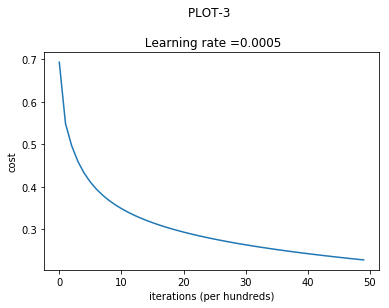

In [35]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-3 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()


# 7 - Run the regression model function to train your model.

### 7.1.2 - SETTING PARAMETERS (PART-1) FOR TRAIN AND DEV DATA

#Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [36]:
d = model(Train_set_x, Train_Set_Y, Dev_set_x, Dev_Set_Y, num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

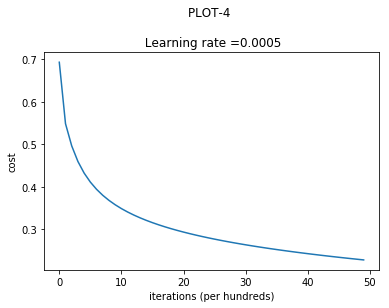

In [37]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-4 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()


## 7 - Run the regression model function to train your model.

### 7.2.1 - SETTING PARAMETERS (PART-2) FOR TRAIN AND TEST DATA

#Set the `num_iterations` to 2000 and `learning_rate` to 0.005

In [38]:
d = model(Train_set_x, Train_Set_Y, Test_set_x, Test_Set_Y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %


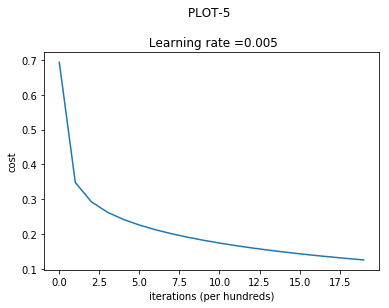

In [39]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-5 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()



# 7 - Run the regression model function to train your model.

## 7.2.2 - SETTING PARAMETERS (PART-2) FOR TRAIN AND DEV DATA

#Set the `num_iterations` to 2000 and `learning_rate` to 0.005

In [40]:
d = model(Train_set_x, Train_Set_Y, Dev_set_x, Dev_Set_Y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %


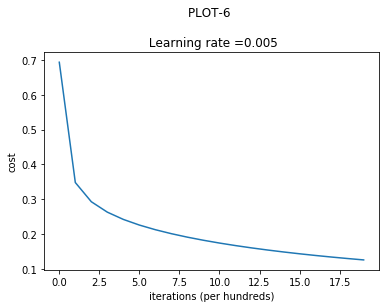

In [41]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("PLOT-6 \n\n Learning rate =" + str(d["learning_rate"]))
plt.show()


## 8 - ANALYSING THE COST AND ACCURACY RESPONSE FOR DIFFERENT VALUES OF LEARNING RATE


learning rate is: 0.02
train accuracy: 99.22630560928434 %
test accuracy: 89.01734104046243 %

-------------------------------------------------------

learning rate is: 0.002
train accuracy: 94.97098646034816 %
test accuracy: 87.86127167630057 %

-------------------------------------------------------

learning rate is: 0.0002
train accuracy: 88.78143133462282 %
test accuracy: 83.23699421965318 %

-------------------------------------------------------



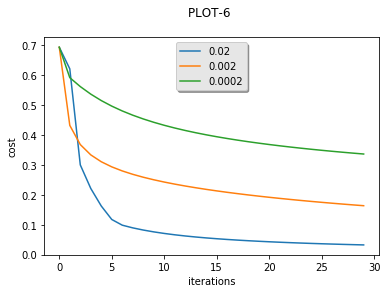

In [42]:
learning_rates = [0.02, 0.002, 0.0002]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(Train_set_x, Train_Set_Y, Test_set_x, Test_Set_Y, num_iterations = 3000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("PLOT-6 \n")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 8.1 - Analysis of accuracy results for Car Dataset
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here
......

#### Observation:

The following data are inferred from the obtained plots (PLOT-3, PLOT-4, PLOT-5, PLOT-6 and PLOT-7)

1) In plot-3, the number of iteration was set as 5000 with learning factor as 0.0005.
   This plot was made for the Train and Test dataset from car_dataset file
    - In this plot it is observed that the cost was decreasing continuously from 0.693 to 0.227 with each iteration.
    - The Training set accuracy is 92.069 and the Test set accuracy is 87.283

2) In plot-4, the number of iteration was set as 5000 with learning factor as 0.0005.
   This plot was made for the Train and Dev dataset from car_dataset file
    - In this plot it is also observed that the cost was decreasing continuously from 0.693 to 0.227 with each iteration.
    - The Training set accuracy is observed the same 92.069 and the Dev set accuracy as 92.441

Inference: The Dev data set has higher accuracy followed by Training and Test set data 

3) In plot-5, the number of iteration was set as 2000 with learning factor as 0.005.
   This plot was made for the Train and Test dataset from car_dataset file
    - In this plot it is observed that the cost was decreasing continuously from 0.693 to 0.126 with each iteration.
    - The Training set accuracy is 97.485 and the Test set accuracy is 89.595   


4) In plot-6, the number of iteration was set as 2000 with learning factor as 0.005.
   This plot was made for the Train and Dev dataset from car_dataset file
    - In this plot it is observed that the cost was decreasing continuously from 0.693 to 0.126 for each iteration.
    - The Training set accuracy is 97.485 and the Test set accuracy is 91.860
    
Inference : The Training set data has higher accuracy followed by Dev set data and Test set data

Hence, with decrease in the iteration count and increase in the learning rates result in the increase in the accuracy of the training set data and test set data but there is a slight decrease in the dev set data accuracy.

5) In plot-7, the cost oscillation adn dataset accuracy is analysed with variations in the learning factor value.

    - In this plot it is observed that the cost was decreasing continuously from 0.69 for all the three different leaning rates.
    - The Training set accuracy and the Test set accuracy was varying according to the differing  learning rates.
 
 Output:
---    learning rate is: 0.02
train accuracy: 99.22630560928434 %
test accuracy: 89.01734104046243 %

-------------------------------------------------------

---    learning rate is: 0.002
train accuracy: 94.97098646034816 %
test accuracy: 87.86127167630057 %

-------------------------------------------------------

----   learning rate is: 0.0002
train accuracy: 88.78143133462282 %
test accuracy: 83.23699421965318 %
    
    - When the value of the learning rate decreases, the training and test data accuracy keeps decreasing. When learning rate is 0.02, the training data set accuracy seems to be good value for the cost. Since the test accuracy is not very less compared to trainng accuracy it may not be considered as overfitting.
    - Thus the different learning rates give different costs and different predictions results.

